In [1]:
import numpy as np
from astropy.table import Table, vstack
import fitsio
import healpy as hp

from astropy.io.fits import getdata
from astropy.io import fits as pyfits

from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
import esutil

import dask
from joblib import Parallel, delayed

import os
from time import sleep
from time import time
import glob
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
indir = '/global/project/projectdirs/des/jesteves/buzzardSelection/v2.0.0/subsample/'

gfile = indir+'buzzard_v2.0.0_0_members.fits'
cfile = indir+'buzzard_v2.0.0_0_cluster.fits'

In [3]:
gal = Table(getdata(gfile))
cat = Table(getdata(cfile))

In [5]:
gid = np.array(gal['galaxy_id']).astype(np.int64)

In [6]:
gidu = np.unique(gid)

In [7]:
gidu.size/gid.size

1.0

In [31]:
gal.colnames

['mag_i_lsst',
 'magerr_z_des',
 'magerr_r_des',
 'magerr_i_des',
 'mag_r_lsst',
 'galaxy_id',
 'mag_z_lsst',
 'magerr_g_des',
 'Mag_true_r_des_z01',
 'healpix_pixel',
 'DEC',
 'Mag_true_i_des_z01',
 'HALOID',
 'halo_mass',
 'RHALO',
 'mag_g_lsst',
 'redshift',
 'is_central',
 'RA',
 'hpx8']

In [8]:
import h5py

path   = '/global/project/projectdirs/des/jderose/Chinchilla/Herd/Chinchilla-3/v2.0.0/sampleselection/Y3a/'
fname  = path+'Buzzard_v2.0_Y3a_bpz.h5'

mfile = h5py.File(fname)
bpz   = mfile['catalog/bpz']

In [10]:
bpz.visititems(show_h5_dataset)

coadd_object_id <HDF5 dataset "coadd_object_id": shape (1504210222,), type ">i8">
redshift_cos <HDF5 dataset "redshift_cos": shape (1504210222,), type ">f8">
z <HDF5 dataset "z": shape (1504210222,), type ">f8">
zmc_sof <HDF5 dataset "zmc_sof": shape (1504210222,), type ">f8">
zmean_sof <HDF5 dataset "zmean_sof": shape (1504210222,), type ">f8">


In [15]:
bpzid = bpz['coadd_object_id'][:][index]

In [23]:
zt    = bpz['z'][:][index]

In [12]:
master = h5py.File(path+'Buzzard-3_v2.0_Y3a_mastercat.h5')

In [13]:
maglim= master['index/maglim/select'][:]

In [14]:
index = master['index/bpz/match_gold'][:][maglim]

In [16]:
import esutil

In [17]:
mask = esutil.numpy_util.match(gid,bpzid)

In [18]:
indices=mask[1]

In [22]:
bpzid

array([361000006475, 361006404380, 361002088779, ..., 115013904713,
       115013919774, 115013908930])

In [24]:
gid

array([           0,           12,           21, ..., 362008017456,
       362008017586, 362008018024])

In [25]:
z=gal['redshift']

In [12]:
master.visititems(show_h5_dataset)

index/bpz/match_gold <HDF5 dataset "match_gold": shape (1504210222,), type "<i8">
index/bpz/select <HDF5 dataset "select": shape (1504210222,), type "<i8">
index/coadd_object_id <HDF5 dataset "coadd_object_id": shape (1504210222,), type "<i8">
index/gold/select <HDF5 dataset "select": shape (1504210222,), type "<i8">
index/maglim/select <HDF5 dataset "select": shape (2388988,), type "<i8">
index/mask/fracgood <HDF5 dataset "fracgood": shape (21590657,), type "<i8">
index/mask/hpix <HDF5 dataset "hpix": shape (21590657,), type "<i8">
index/mask/zmax <HDF5 dataset "zmax": shape (21590657,), type "<i8">
index/metacal/match_gold <HDF5 dataset "match_gold": shape (1504210222,), type "<i8">
index/redmagic/combined_sample_fid/match_gold <HDF5 dataset "match_gold": shape (3041935,), type "<i8">
index/redmagic/combined_sample_fid/random_10xdownsample_select <HDF5 dataset "random_10xdownsample_select": shape (30419350,), type "<i8">
index/redmagic/combined_sample_fid/random_select <HDF5 dataset 

In [9]:
def show_h5_group(name,node):
    ''' show all the h5 groups
    Example:
    fmaster = h5py.File(copa.master_fname,'r')
    fmaster.visititems(show_h5_group)

    ## https://stackoverflow.com/questions/45562169/traverse-hdf5-file-tree-and-continue-after-return
    '''
    if isinstance(node, h5py.Group):
        print(name,node)
    return None

def show_h5_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(name,node)
    return None

In [44]:
maglim = master['index/maglim/select'][:]

In [45]:
healpix = gold['coadd_object_id'][:][maglim]

In [50]:
healpix.size

2388988

In [47]:
mask = esutil.numpy_util.match(gid,healpix)

In [48]:
indices=mask[1]

In [49]:
indices

array([], dtype=int64)

<ipython-input-55-c7ccb4f5df79>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  hpxmap = np.zeros(npix, dtype=np.float)


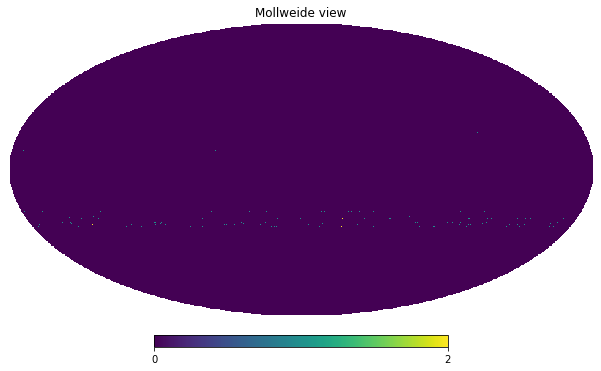

In [55]:
npix = hp.nside2npix(nside)
hpxmap = np.zeros(npix, dtype=np.float)
w, values = np.unique(healpix,return_counts=True)
hpxmap[w] = values

hp.mollview(hpxmap)

In [56]:
import esutil

In [48]:
mask = esutil.numpy_util.match(hpx_map,healpix)

In [49]:
indices=mask[1]

In [50]:
indices

array([], dtype=int64)

In [58]:
ra = gold['ra'][:][maglim_idx]

In [57]:
dec = gold['dec'][:][maglim_idx]

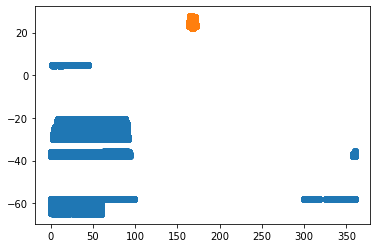

In [60]:
ra1= gal['RA']
dec1= gal['DEC']

plt.scatter(ra,dec)
plt.scatter(ra1,dec1)

In [89]:
indir='/global/project/projectdirs/des/jderose/Chinchilla/Herd/Chinchilla-3/addgalspostprocess/'

In [112]:
halos_files = glob.glob(indir+'halos/*.fits')
gals_files  = glob.glob(indir+'Y3a/Chinchilla-3Y3a_v2.0_obs.*.fits')

In [113]:
#c1 = vstack([Table(getdata(halos_files[i])) for i in range(5)])

In [114]:
gals_files

['/global/project/projectdirs/des/jderose/Chinchilla/Herd/Chinchilla-3/addgalspostprocess/Y3a/Chinchilla-3Y3a_v2.0_obs.16.fits',
 '/global/project/projectdirs/des/jderose/Chinchilla/Herd/Chinchilla-3/addgalspostprocess/Y3a/Chinchilla-3Y3a_v2.0_obs.375.fits',
 '/global/project/projectdirs/des/jderose/Chinchilla/Herd/Chinchilla-3/addgalspostprocess/Y3a/Chinchilla-3Y3a_v2.0_obs.380.fits',
 '/global/project/projectdirs/des/jderose/Chinchilla/Herd/Chinchilla-3/addgalspostprocess/Y3a/Chinchilla-3Y3a_v2.0_obs.86.fits',
 '/global/project/projectdirs/des/jderose/Chinchilla/Herd/Chinchilla-3/addgalspostprocess/Y3a/Chinchilla-3Y3a_v2.0_obs.119.fits',
 '/global/project/projectdirs/des/jderose/Chinchilla/Herd/Chinchilla-3/addgalspostprocess/Y3a/Chinchilla-3Y3a_v2.0_obs.40.fits',
 '/global/project/projectdirs/des/jderose/Chinchilla/Herd/Chinchilla-3/addgalspostprocess/Y3a/Chinchilla-3Y3a_v2.0_obs.116.fits',
 '/global/project/projectdirs/des/jderose/Chinchilla/Herd/Chinchilla-3/addgalspostprocess/Y3a

In [115]:
fits = fitsio.FITS(gals_files[0])

In [117]:
fits[1]


  file: /global/project/projectdirs/des/jderose/Chinchilla/Herd/Chinchilla-3/addgalspostprocess/Y3a/Chinchilla-3Y3a_v2.0_obs.16.fits
  extension: 1
  type: BINARY_TBL
  rows: 16130977
  column info:
    ID                  i8  
    RA                  f8  
    DEC                 f8  
    EPSILON1            f8  
    EPSILON2            f8  
    SIZE                f8  
    PHOTOZ_GAUSSIAN     f8  
    MAG_G               f8  
    MAGERR_G            f8  
    FLUX_G              f8  
    IVAR_G              f8  
    MAG_R               f8  
    MAGERR_R            f8  
    FLUX_R              f8  
    IVAR_R              f8  
    MAG_I               f8  
    MAGERR_I            f8  
    FLUX_I              f8  
    IVAR_I              f8  
    MAG_Z               f8  
    MAGERR_Z            f8  
    FLUX_Z              f8  
    IVAR_Z              f8  
    MCAL_MAG_R          f8  
    MCAL_MAGERR_R       f8  
    MCAL_FLUX_R         f8  
    MCAL_IVAR_R         f8  
    MCAL_MAG_I   

In [102]:
h=0.7
def get_mask(f,mask):
    fits = fitsio.FITS(f)
    if mask is not None: w = fits[1].where(mask)
    else: w = np.arange(fits[1].get_nrows(),dtype=np.int64)
    fits.close()
    return w
def loadfiles(filenames, columns=None, mask=None):
    '''
    Read a set of filenames with fitsio.read and return a concatenated array
    '''
    out = []
    i = 1
    print()
    for f in filenames:
        print('File {i}: {f}'.format(i=i, f=f))
        if not os.path.isfile(f):
            print('file not found: %s'%f)
        else:
            w = get_mask(f,mask) ## if mask None returns all the rows
            ## loading subset
            g0= Table(fitsio.read(f,rows=w,columns=columns))
            out.append(g0)
        i += 1
    mygals  = [data for data in out if data is not None]
    data       = vstack(mygals)
    return data

def load_files(files,magMax=29.):
    colnames      = ['ID', 'HALOID', 'RA', 'DEC', 'Z', 'OMAG', 'OMAGERR', 'AMAG', 'RHALO', 'CENTRAL','M200','R200','MAG_R']
    #amag_cut = amagMax - 5*np.log10(h)
    mag_mask = 'OMAG[1] < %.2f'%(magMax)

    t0= time()
    g = loadfiles(files,mask=mag_mask,columns=colnames)
    print('loading time: %.2f s \n'%(time()-t0))

    return g

In [103]:
g = load_files(gals_files[:3])


File 1: /global/project/projectdirs/des/jderose/Chinchilla/Herd/Chinchilla-3/addgalspostprocess/Y3a/Chinchilla-3Y3a_v2.0_obs_rmp_0011098.fit


OSError: FITSIO status = 202: keyword not found in header
ffgcnn could not find column: OMAG
ffgkey could not find keyword: OMAG


In [81]:
ra,dec = c1['TRA'],c1['TDEC']

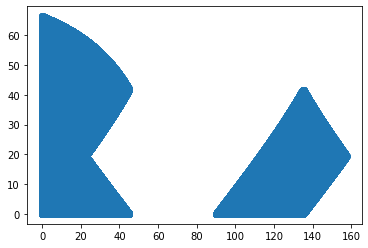

In [82]:
plt.scatter(ra,dec)

In [77]:
c1['RA','DEC','TDEC']

RA,DEC,TDEC
float64,float64,float64
0.0,0.0,20.0600898869494
0.0,0.0,20.104501771990044
0.0,0.0,20.090638036766393
0.0,0.0,20.127252343215602
0.0,0.0,20.136316445805278
0.0,0.0,20.132453217357096
0.0,0.0,20.0031234705003
0.0,0.0,20.100973830992956
0.0,0.0,20.079621169919847
